This is the feedforward neuronal model 

In [12]:
from foundations.helpers import scale_input_theory
from brian2 import *
from foundations.helpers import scale_to_freq
from foundations.make_dynamic_experiments import make_dynamic_experiments
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [13]:
#parameters setting 
#TODO: set these parameters in a file
baseline = 0
theta = 0
factor_ron_roff = 2
tau_PC = 250
ron_PC = 1./(tau_PC*(1+factor_ron_roff))
roff_PC = factor_ron_roff*ron_PC
mean_firing_rate_PC = (0.1)/1000
duration_PC = 100000
tau_IN = 50
ron_IN = 1./(tau_IN*(1+factor_ron_roff))
roff_IN = factor_ron_roff*ron_IN
mean_firing_rate_IN = (0.5)/1000
duration_IN = 20000
sampling_rate = 5
dt = 1/sampling_rate
qon_qoff_type = 'balanced'
Er_exc, Er_inh = (0, -75)
target_PC = 1.4233
target_IN = 6.6397
on_off_ratio = 1.5
scale_list = np.append([1], np.arange(2.5, 302.5, 2.5))
scales = {'CC_PC':19, 'DC_PC':30, 'CC_IN':17, 'DC_IN':6}
N_runs = 1
defaultclock.dt = dt*ms
PC_i = 35
IN_i = 11

In [14]:
#Getting the input
[input_theory, dynamic_theory, hidden_state] = make_dynamic_experiments(qon_qoff_type, baseline, tau_PC, factor_ron_roff, mean_firing_rate_PC, sampling_rate, duration_PC)
inj_input = scale_input_theory(input_theory, 'current', 0, scales['CC_IN'], dt)

In [19]:
from models.currentmodel import Barrel_PC, Barrel_IN
start_scope()
#Initialising the neuron classes
PC = Barrel_PC(dt=dt)
IN = Barrel_IN(dt=dt)
#Getting the neurongroups
PC_neuron = PC.getNeurongroup()
IN_neuron = IN.getNeurongroup()
#adding the neurons to the network
net = Network(PC_neuron, IN_neuron)
#getting the statemonitors from befor the connection 
pre_PC_M = StateMonitor(PC_neuron, 'v', record=True)
IN_M = StateMonitor(IN_neuron, 'v', record=True)
net.add(pre_PC_M, IN_M)
#making the synapse

param = PC.getNamespace().update(IN.getNamespace()) #getting all the parameters for in the synapse
syn = Synapses(IN_neuron, PC_neuron, on_pre='''v_post += 0.5*mV''', namespace = param)

syn.connect()

post_PC_M = StateMonitor(PC_neuron, 'v', record=True)
net.add(syn, post_PC_M)

run(1*second)

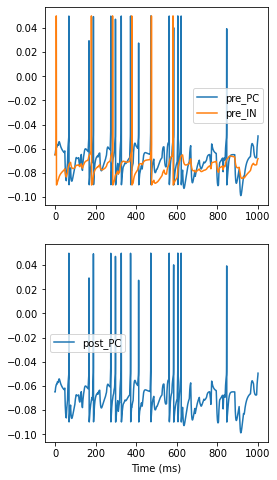

In [20]:
figure(figsize=(4, 8))
subplot(211)
plot(pre_PC_M.t/ms, pre_PC_M.v[0], label='pre_PC')
plot(IN_M.t/ms, IN_M.v[0], label="pre_IN")
legend()
subplot(212)
plot(post_PC_M.t/ms, post_PC_M.v[0], label="post_PC")
legend(loc='best')
xlabel('Time (ms)');